In [ ]:
# A brief about the problem statement 

In [ ]:
'''
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer
first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit 
History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible 
for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
'''

In [ ]:
# Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns                   
import matplotlib.pyplot as plt        
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Loading train and test dataset 

In [105]:
train=pd.read_csv("C://Users//acer//Desktop//1sem//python//Loan pred//train.csv")

In [ ]:
# Lets have a glance at the dataset

In [34]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# shape of train dataset

In [3]:
train.shape

(614, 13)

In [ ]:
# Listing all column of train dataset

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# A detailed summary of train dataset

In [5]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
Loan_ID,0,0.000000,object,614
Gender,13,0.021173,object,2
Married,3,0.004886,object,2
Dependents,15,0.024430,object,4
Education,0,0.000000,object,2
Self_Employed,32,0.052117,object,2
ApplicantIncome,0,0.000000,int64,505
CoapplicantIncome,0,0.000000,float64,287
LoanAmount,22,0.035831,float64,203
Loan_Amount_Term,14,0.022801,float64,10


In [ ]:
# Basic stats value of dataset

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Test dataset

In [106]:
test=pd.read_csv("C://Users//acer//Desktop//1sem//python//Loan pred//test.csv")

In [ ]:
# shape of test dataset

In [10]:
test.shape

(367, 12)

In [ ]:
# all columns

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
# Detailed summary of test dataset

In [12]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
Loan_ID,0,0.000000,object,367
Gender,11,0.029973,object,2
Married,0,0.000000,object,2
Dependents,10,0.027248,object,4
Education,0,0.000000,object,2
Self_Employed,23,0.062670,object,2
ApplicantIncome,0,0.000000,int64,314
CoapplicantIncome,0,0.000000,int64,194
LoanAmount,5,0.013624,float64,144
Loan_Amount_Term,6,0.016349,float64,12


In [ ]:
# EDA : Univariate analysis

In [ ]:
# Target Variable

In [15]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

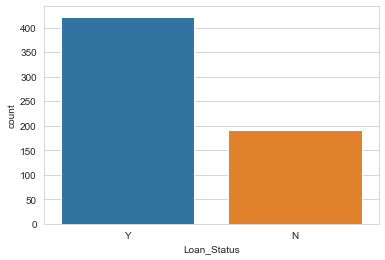

In [17]:
sns.countplot(train.Loan_Status)

In [ ]:
# categorical variables

In [ ]:
# Lets drop Loan id as it doesnot serve any meaning in predicting target variable

In [107]:
del train["Loan_ID"]

In [108]:
del test["Loan_ID"]

In [26]:
catcol=train.select_dtypes(include="object").columns[:-1].tolist()

In [28]:
catcol=train[catcol]

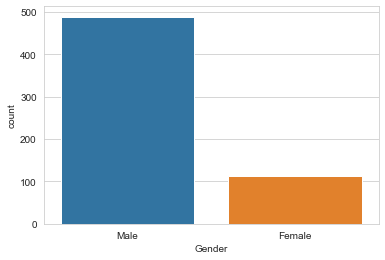

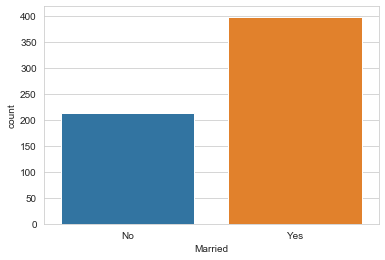

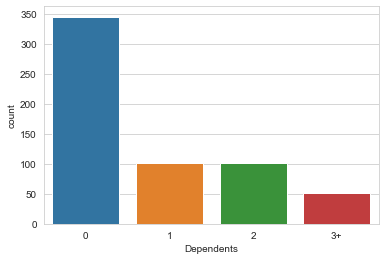

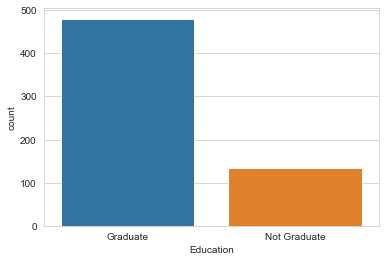

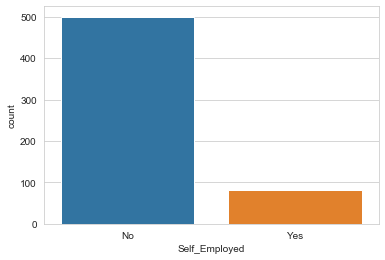

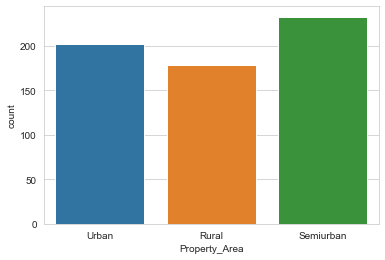

In [33]:
for feature in catcol:
    sns.countplot(catcol[feature])
    plt.xlabel(feature)
    plt.show()

In [ ]:
# Box plot

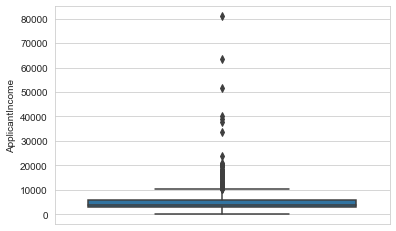

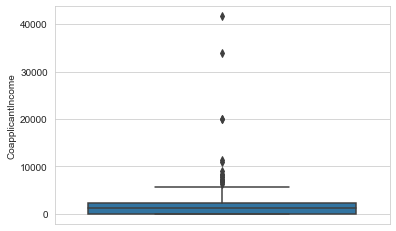

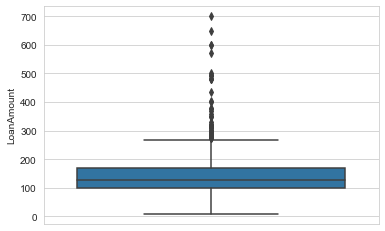

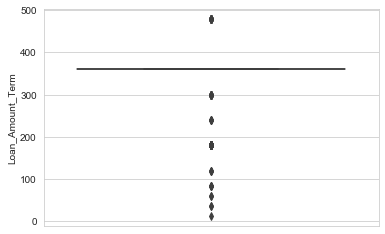

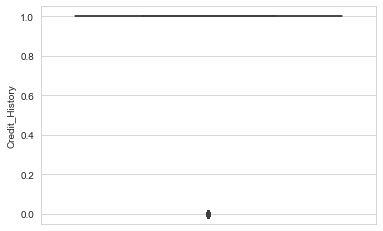

In [57]:
for feature in train.columns:
    if train[feature].dtypes in(["int64","float64"]):
        sns.boxplot(y=train[feature])
        plt.show()

In [ ]:
# Impute missing values with mode 

In [109]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [55]:
# As we have outliers in loan amount we will impute 

In [110]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
# Lets see the distribution of numerical variables

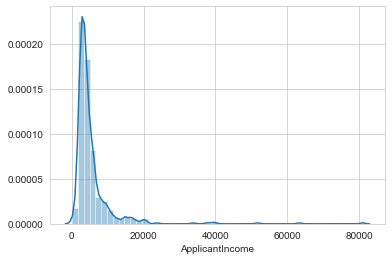

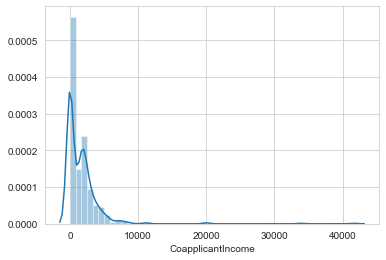

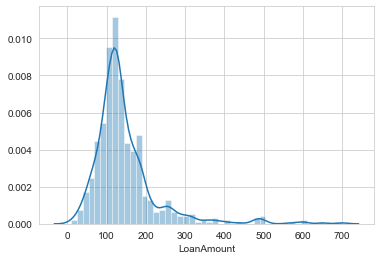

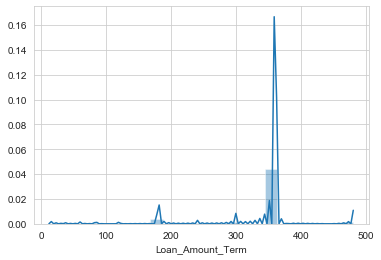

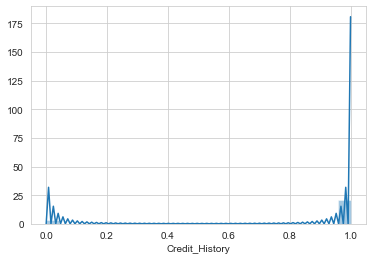

In [62]:
for feature in train.columns:
    if train[feature].dtypes in(["int64","float64"]):
        sns.distplot(train[feature])
        plt.show()

In [ ]:
'''
we can see the distribution doesnt follow normal distribution and it is skewed due to effect of outliers. In order to remove 
the effect of outliers we need to transform this variable, we can do log,square,root,exp
'''

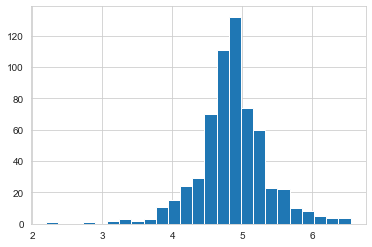

In [65]:
np.log(train['LoanAmount']).hist(bins=25)

In [ ]:
# Log fits the data well and results in normal distribution,lets transform this variable using log

In [111]:
train["LoanAmount"]=np.log(train['LoanAmount'])

In [ ]:
# Label encoding all categorical features to convert all string to numeric

In [82]:
from sklearn import preprocessing

In [112]:
le = preprocessing.LabelEncoder()

In [113]:
train=train.apply(le.fit_transform)

In [153]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1


In [ ]:
# Same process we have to follow for test dataset also

In [114]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [115]:
test["LoanAmount"]=np.log(test['LoanAmount'])

In [117]:
le = preprocessing.LabelEncoder()
test=test.apply(le.fit_transform)

In [ ]:
# It looks like our dataset is ready for model building,lets divide datasset into dependent and independent variable

In [120]:
y=train["Loan_Status"]
x=train.drop("Loan_Status",axis=1)

In [ ]:
# Lets split dataset 

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# checking shape of splitted dataset

In [124]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (429, 11)
shape of y_train: (429,)
shape of x_test: (185, 11)
shape of y_test: (185,)


In [ ]:
# Lets apply ml algo

In [125]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Extra trees classifier

In [126]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

In [ ]:
# Looking at the output 

In [127]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
350    1          1
377    1          1
163    1          1
609    1          1
132    1          1
..   ...        ...
380    1          1
446    1          1
144    1          1
290    1          0
353    0          0

[185 rows x 2 columns]


In [ ]:
# Evaluating result 

In [129]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.745945945945946
Kappa is : 0.3887521968365554
Sensitiviy is : 0.9083333333333333
Precision is : 0.7517241379310344
Area under curve is  :0.6772435897435897
[[ 29  36]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        65
           1       0.75      0.91      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.68      0.69       185
weighted avg       0.74      0.75      0.73       185



In [ ]:
# Applying cart

In [131]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

     Act  Predicted
350    1          0
377    1          1
163    1          0
609    1          0
132    1          1
..   ...        ...
380    1          1
446    1          1
144    1          1
290    1          1
353    0          0

[185 rows x 2 columns]
accuracy score is 0.654054054054054
Kappa is : 0.25674827369742625
Sensitiviy is : 0.7083333333333334
Precision is : 0.7456140350877193
Area under curve is  :0.6310897435897437
[[36 29]
 [35 85]]
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        65
           1       0.75      0.71      0.73       120

    accuracy                           0.65       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.66      0.65      0.66       185



In [ ]:
# Random forest

In [132]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

     Act  Predicted
350    1          1
377    1          1
163    1          1
609    1          1
132    1          1
..   ...        ...
380    1          1
446    1          1
144    1          1
290    1          1
353    0          0

[185 rows x 2 columns]
accuracy score is 0.7513513513513513
Kappa is : 0.413103448275862
Sensitiviy is : 0.8916666666666667
Precision is : 0.7642857142857142
Area under curve is  :0.6919871794871795
[[ 32  33]
 [ 13 107]]
              precision    recall  f1-score   support

           0       0.71      0.49      0.58        65
           1       0.76      0.89      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.75      0.74       185



c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Bagging classifier

In [133]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

     Act  Predicted
350    1          1
377    1          1
163    1          0
609    1          0
132    1          1
..   ...        ...
380    1          1
446    1          1
144    1          1
290    1          1
353    0          0

[185 rows x 2 columns]
accuracy score is 0.7243243243243244
Kappa is : 0.36142131979695435
Sensitiviy is : 0.85
Precision is : 0.7555555555555555
Area under curve is  :0.6711538461538462
[[ 32  33]
 [ 18 102]]
              precision    recall  f1-score   support

           0       0.64      0.49      0.56        65
           1       0.76      0.85      0.80       120

    accuracy                           0.72       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.71      0.72      0.71       185



In [ ]:
# LOgistic regresssion

In [134]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


     Act  Predicted
350    1          1
377    1          1
163    1          1
609    1          1
132    1          1
..   ...        ...
380    1          1
446    1          1
144    1          1
290    1          1
353    0          0

[185 rows x 2 columns]
accuracy score is 0.7837837837837838
Kappa is : 0.4566813509544787
Sensitiviy is : 0.9833333333333333
Precision is : 0.7564102564102564
Area under curve is  :0.6993589743589743
[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [ ]:
# Lets apply LR on test dataset

In [135]:
lr=LogisticRegression()
lr.fit(x,y)
prediction=dt.predict(test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [141]:
pred=pd.DataFrame({"Predicted output":prediction})

In [ ]:
# Lets submit our prediction as required

In [139]:
sub=pd.read_csv("C://Users//acer//Desktop//1sem//python//Loan pred//test.csv",usecols=["Loan_ID"])

In [150]:
final_prediction=pd.DataFrame({"Loan_ID":sub["Loan_ID"],"Loan_Status":pred["Predicted output"]})

In [ ]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [ ]:
# Lets change the target variable as asked 

In [155]:
loan={0:"N",1:"Y"}
final_prediction["Loan_Status"]=final_prediction["Loan_Status"].map(loan)

In [ ]:
# Converting to csv

In [157]:
final_prediction.to_csv("LoanPred2.csv",index=False)